In [1]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
label = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

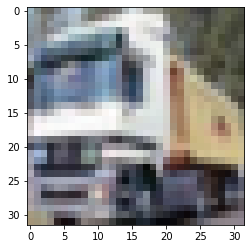

In [25]:
plt.imshow(x_train[1])

In [26]:
import numpy as np
label[int(y_train[1])]

'truck'

In [27]:
from keras.utils.np_utils import to_categorical

y_train_en = to_categorical(y_train, 10)
y_test_en = to_categorical(y_test, 10)

In [28]:
y_train_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [33]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
his = model.fit(x_train, y_train_en, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5082 - accuracy: 0.4617
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1521 - accuracy: 0.5947
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0005 - accuracy: 0.6524
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9024 - accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8269 - accuracy: 0.7147
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7709 - accuracy: 0.7363
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7267 - accuracy: 0.7524
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6921 - accuracy: 0.7664
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6608 - accuracy: 0.7767
Epoch 10/10
1563/1563 [==============================] - 32s 20m

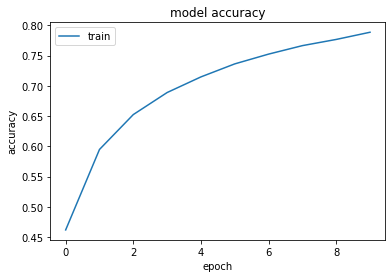

In [37]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
#plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

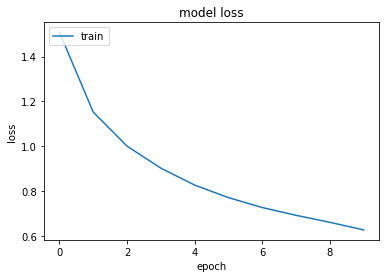

In [38]:
# summarize history for loss
plt.plot(his.history['loss'])
#plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
his.model.evaluate(x_test, y_test_en)

313/313 [==============================] - 2s 4ms/step - loss: 1.2669 - accuracy: 0.6719


[1.2668918371200562, 0.6718999743461609]

In [40]:
from sklearn.metrics import classification_report

In [43]:
predict_x=his.model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [56]:
print(classification_report(np.argmax(y_test_en, axis=1), classes_x))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1000
           1       0.82      0.79      0.80      1000
           2       0.65      0.51      0.57      1000
           3       0.51      0.48      0.50      1000
           4       0.70      0.60      0.64      1000
           5       0.54      0.64      0.59      1000
           6       0.90      0.58      0.70      1000
           7       0.65      0.82      0.72      1000
           8       0.62      0.87      0.72      1000
           9       0.82      0.68      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000

